In [2]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')

## I. Explore the Bechdel Test dataset
Scores
* 1 point - at least two named female characters
* 2 points - two named female characters talk to each other
* 3 points (passing) - two named female characters talk to each other about something other than a man

In [3]:
bechdel_df = pd.read_csv('my_data/best_bechdel_df_so_far.csv')
bechdel_df.head()

,Unnamed: 0,year,title,score,passing,imdb_id,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
0,0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,Alita: Battle Angel,170000000.0,359700000.0,tt0437086,0.0,1.0,0.0,0.0,1.0
1,1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2019.0,Close,3.0,1.0,tt5316540,Close,NaN,NaN,tt5316540,1.0,1.0,0.0,0.0,2.0
3,3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,Cold Pursuit,NaN,NaN,tt5719748,0.0,0.0,0.0,0.0,0.0
4,4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bechdel_df.drop('Unnamed: 0', axis=1, inplace=True)
bechdel_df.tail()

,year,title,score,passing,imdb_id,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
8084,1896.0,Une nuit terrible,0.0,0.0,tt0000131,A Terrible Night,NaN,NaN,tt0000131,0.0,0.0,0.0,0.0,0.0
8085,1895.0,"The Execution of Mary, Queen of Scots",0.0,0.0,tt0132134,The Execution of Mary Stuart,NaN,NaN,tt0132134,0.0,0.0,0.0,0.0,0.0
8086,1895.0,Tables Turned on the Gardener,0.0,0.0,tt0000014,L'Arroseur Arrosé,NaN,NaN,tt0000014,0.0,0.0,0.0,0.0,0.0
8087,1892.0,Pauvre Pierrot,0.0,0.0,tt0000003,Pauvre Pierrot,NaN,NaN,tt0000003,0.0,0.0,0.0,0.0,0.0
8088,1888.0,Roundhay Garden Scene,0.0,0.0,tt0392728,Roundhay Garden Scene,NaN,NaN,tt0392728,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Cleaning
# drop unnamed column (beware indexing if you save this as a new csv)
# change floats to ints? - or should numeric columns be standardized? Are you supposed to standardize dates if not
# doing Time Series?
# change any strings that should be ints

# Check for
# any movies in which the 'title' does not match the 'movieTitle' 
# same for imdb_id and imdbId
# amount of rows with budget and/or boxoffice - are these enough to analyze on their own?

In [5]:
bechdel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8089 entries, 0 to 8088
Data columns (total 14 columns):
year               8089 non-null float64
title              8089 non-null object
score              8089 non-null float64
passing            8089 non-null float64
imdb_id            8089 non-null object
movieTitle         7633 non-null object
budgetAmount       989 non-null float64
boxofficeAmount    1271 non-null float64
imdbId             7633 non-null object
director_fnbt      7633 non-null float64
writer_fnbt        7633 non-null float64
exec_fnbt          7633 non-null float64
producer_fnbt      7633 non-null float64
overall_fnbt       7633 non-null float64
dtypes: float64(10), object(4)
memory usage: 884.8+ KB


In [6]:
# column types are good

In [7]:
bechdel_df.isnull().sum()

year                  0
title                 0
score                 0
passing               0
imdb_id               0
movieTitle          456
budgetAmount       7100
boxofficeAmount    6818
imdbId              456
director_fnbt       456
writer_fnbt         456
exec_fnbt           456
producer_fnbt       456
overall_fnbt        456
dtype: int64

In [9]:
bechdel_df.shape

(8089, 14)

In [11]:
# check distribution of scores

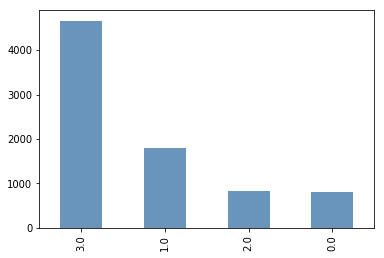

In [14]:
bechdel_df.score.value_counts().plot(kind='bar', color='#6995BC');

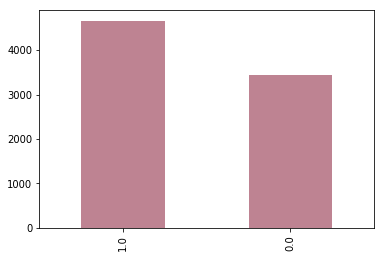

In [15]:
bechdel_df.passing.value_counts().plot(kind='bar', color='#BE8392');

In [16]:
# looks like passing vs. non-passing will be the better metric, as the classes are more balanced

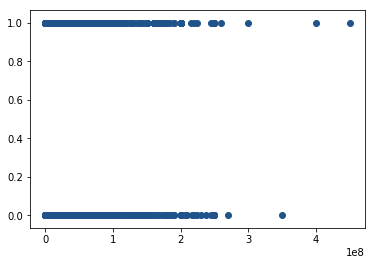

In [17]:
plt.scatter(x=bechdel_df.budgetAmount, y=bechdel_df.passing, color='#20538B');

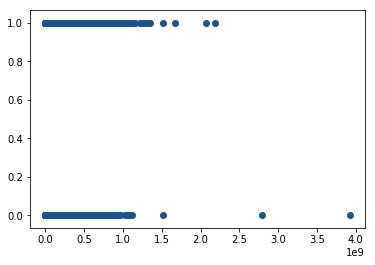

In [18]:
plt.scatter(x=bechdel_df.boxofficeAmount, y=bechdel_df.passing, color='#20538B');

In [6]:
bechdel_df.isnull().sum()

year                  0
title                 0
score                 0
passing               0
imdb_id               0
movieTitle          456
budgetAmount       7100
boxofficeAmount    6818
imdbId              456
director_fnbt       456
writer_fnbt         456
exec_fnbt           456
producer_fnbt       456
overall_fnbt        456
dtype: int64

In [10]:
print(f'Out of {bechdel_df.shape[0]} movies, there are:')
print(f'{8089 - 7100} with budgets')
print(f'{8089 - 6818} with box office revenues')
print(f'{8089 - 456} with gender info')

Out of 8089 movies, there are:
989 with budgets
1271 with box office revenues
7633 with gender info


In [11]:
# drop budget and box office columns for now, plus the 456 rows with no additional info

In [12]:
bechdel_df.drop(columns=['budgetAmount', 'boxofficeAmount'], axis=1, inplace=True)

In [13]:
bechdel_df.head()

,year,title,score,passing,imdb_id,movieTitle,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,Alita: Battle Angel,tt0437086,0.0,1.0,0.0,0.0,1.0
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.0,Close,3.0,1.0,tt5316540,Close,tt5316540,1.0,1.0,0.0,0.0,2.0
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,Cold Pursuit,tt5719748,0.0,0.0,0.0,0.0,0.0
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
bechdel_df.isnull().sum()

year               0
title              0
score              0
passing            0
imdb_id            0
movieTitle       456
imdbId           456
director_fnbt    456
writer_fnbt      456
exec_fnbt        456
producer_fnbt    456
overall_fnbt     456
dtype: int64

In [15]:
bechdel_df.dropna(inplace=True)

In [16]:
bechdel_df.isnull().sum()

year             0
title            0
score            0
passing          0
imdb_id          0
movieTitle       0
imdbId           0
director_fnbt    0
writer_fnbt      0
exec_fnbt        0
producer_fnbt    0
overall_fnbt     0
dtype: int64

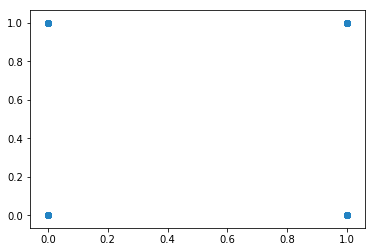

In [18]:
plt.scatter(x=bechdel_df.passing, y=bechdel_df.director_fnbt, color='#2383C3');

In [19]:
# ha

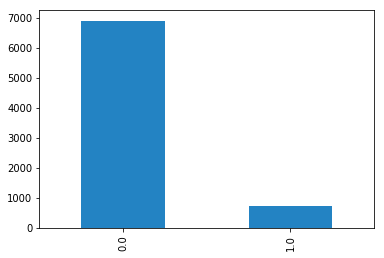

In [20]:
bechdel_df.director_fnbt.value_counts().plot(kind='bar', color='#2383C3');

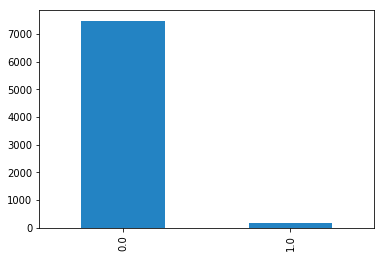

In [22]:
bechdel_df.exec_fnbt.value_counts().plot(kind='bar', color='#2383C3');

In [23]:
def check_distributions(column):
    column.value_counts().plot(kind='bar', color='#6CC871');

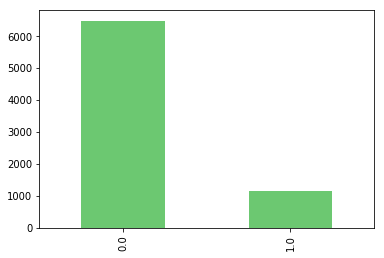

In [24]:
check_distributions(bechdel_df.producer_fnbt)

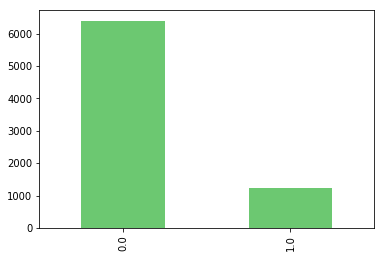

In [25]:
check_distributions(bechdel_df.writer_fnbt)

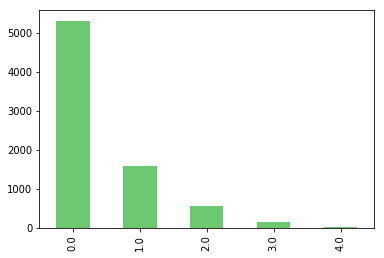

In [26]:
check_distributions(bechdel_df.overall_fnbt)

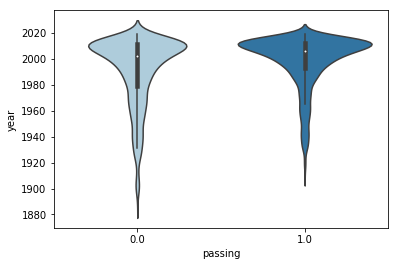

In [27]:
sns.set_palette('Paired')
sns.violinplot(x=bechdel_df.passing, y=bechdel_df.year)

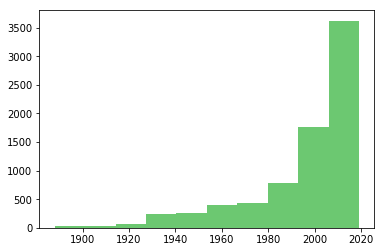

In [28]:
plt.hist(bechdel_df.year, color='#6CC871');

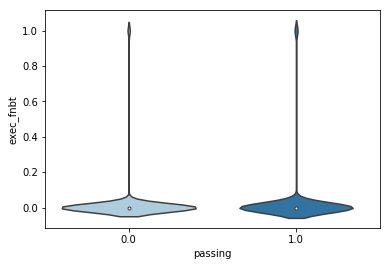

In [29]:
sns.violinplot(x=bechdel_df.passing, y=bechdel_df.exec_fnbt);

In [31]:
def check_violin_plot(column):
    sns.violinplot(x=bechdel_df.passing, y=column);

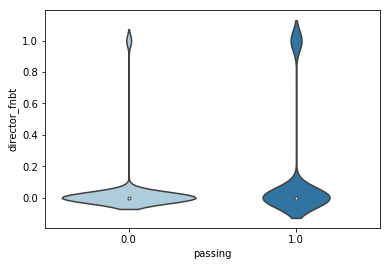

In [32]:
check_violin_plot(bechdel_df.director_fnbt)

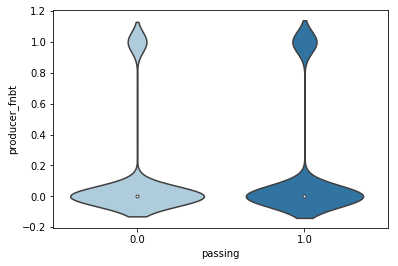

In [33]:
check_violin_plot(bechdel_df.producer_fnbt)

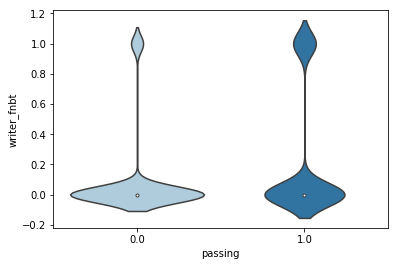

In [34]:
check_violin_plot(bechdel_df.writer_fnbt)

In [35]:
bechdel_df.shape

(7633, 12)

In [36]:
# this is not enough data